In [3]:
import pandas as pd
import regex as re

In [4]:
df = pd.read_csv('https://files.challengerocket.com/files/lions-den-ing-2024/development_sample.csv')

In [5]:
df

,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,_r_
0,11034977,32537148,01Feb2010 0:00:00,0.0,Approved,1,2.0,1,7800,99,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,01Feb2010 0:00:00,0.0,Approved,1,1.0,2,11100,78,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,01Feb2010 0:00:00,0.0,Approved,2,3.0,1,2400,15,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,01Feb2010 0:00:00,0.0,Approved,3,1.0,2,11800,30,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
4,11034981,32692110,02Feb2010 0:00:00,NaN,Rejected,1,2.0,1,10200,72,...,2,2,0,9908.45,0.00,0,0,20,3899,0.210913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11084972,32554904,31Dec2020 0:00:00,1.0,Approved,2,1.0,1,49200,111,...,2,2,0,NaN,NaN,0,0,0,12832,0.783954
49996,11084973,32884069,31Dec2020 0:00:00,NaN,Rejected,1,2.0,1,25600,30,...,3,4,0,NaN,NaN,0,0,0,12832,0.172590
49997,11084974,32433438,31Dec2020 0:00:00,0.0,Approved,1,1.0,1,46700,18,...,0,0,0,9288.87,255018.31,0,0,0,12832,0.060722
49998,11084975,32877592,31Dec2020 0:00:00,NaN,Rejected,1,1.0,Direct,44300,162,...,3,3,102000,NaN,NaN,0,0,10,12832,0.845866


In [6]:
df.columns

Index(['ID', 'customer_id', 'application_date', 'target', 'Application_status',
       'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17',
       'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25',
       'Var26', 'Var27', 'Var28', 'Var29', 'Var30', '_r_'],
      dtype='object')

In [7]:
nonNullDf = df.dropna()
nonNullDf

,ID,customer_id,application_date,target,Application_status,Var1,Var2,Var3,Var4,Var5,...,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,_r_


In [8]:
df.columns

Index(['ID', 'customer_id', 'application_date', 'target', 'Application_status',
       'Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'Var6', 'Var7', 'Var8', 'Var9',
       'Var10', 'Var11', 'Var12', 'Var13', 'Var14', 'Var15', 'Var16', 'Var17',
       'Var18', 'Var19', 'Var20', 'Var21', 'Var22', 'Var23', 'Var24', 'Var25',
       'Var26', 'Var27', 'Var28', 'Var29', 'Var30', '_r_'],
      dtype='object')

In [34]:
import os
cwd = os.getcwd().replace('jupyter_notebooks', '')
dataDict = f'{cwd}data'


df = pd.read_csv(f'{dataDict}\\development_sample.csv')
columnHeaders = pd.read_excel(f'{dataDict}\\variables_description.xlsx', sheet_name= 'List of variables')
#f'{cwd}\\data\\variables_description.xlsx'

In [51]:
VarList = columnHeaders['Column'].values.tolist()
DescList = columnHeaders['Description'].values.tolist()

DescList[3] = 'Default indicator'

for i in range(len(DescList)):
    DescList[i] = DescList[i].replace('Application data: ', '')
    DescList[i] = DescList[i].replace('(Approved/Rejected)', '')
    reg = r' \([\s\S]*\)'
    DescList[i] = re.sub(reg, '', DescList[i])

newColNames = {}

for i in range(len(VarList)):
    newColNames[VarList[i]] = DescList[i]

df.rename(columns = newColNames, inplace = True) 
df

,ID,Customer ID,Application date,Default indicator,Application_status,Number of applicants,Loan purpose,Distribution channel,Application amount,Credit duration,...,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_,date dif
0,11034977,32537148,2010-02-01,0.0,Approved,1,2.0,1,7800,99,...,1,0,6768.42,0.00,0,0,0,3899,0.267045,1893 days
1,11034978,32761663,2010-02-01,0.0,Approved,1,1.0,2,11100,78,...,0,15000,5937.66,3870.60,0,0,0,3899,0.533040,4886 days
2,11034979,32701063,2010-02-01,0.0,Approved,2,3.0,1,2400,15,...,2,0,5647.77,1463.08,0,0,10,3899,0.861555,7576 days
3,11034980,32386786,2010-02-01,0.0,Approved,3,1.0,2,11800,30,...,0,0,3594.90,21563.78,0,0,10,3899,0.506451,8093 days
4,11034981,32692110,2010-02-02,NaN,Rejected,1,2.0,1,10200,72,...,2,0,9908.45,0.00,0,0,20,3899,0.210913,7565 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11084972,32554904,2020-12-31,1.0,Approved,2,1.0,1,49200,111,...,2,0,NaN,NaN,0,0,0,12832,0.783954,4661 days
49996,11084973,32884069,2020-12-31,NaN,Rejected,1,2.0,1,25600,30,...,4,0,NaN,NaN,0,0,0,12832,0.172590,8087 days
49997,11084974,32433438,2020-12-31,0.0,Approved,1,1.0,1,46700,18,...,0,0,9288.87,255018.31,0,0,0,12832,0.060722,5178 days
49998,11084975,32877592,2020-12-31,NaN,Rejected,1,1.0,Direct,44300,162,...,3,102000,NaN,NaN,0,0,10,12832,0.845866,1522 days


In [52]:
df[['Application date', 'employment date']]

,Application date,employment date
0,2010-02-01,2004-11-26
1,2010-02-01,1996-09-16
2,2010-02-01,1989-05-06
3,2010-02-01,1987-12-06
4,2010-02-02,1989-05-18
...,...,...
49995,2020-12-31,2008-03-28
49996,2020-12-31,1998-11-10
49997,2020-12-31,2006-10-28
49998,2020-12-31,2016-10-31


In [55]:

df['employment date'] = pd.to_datetime(df['employment date'], format='%d%b%Y', errors = 'coerce')
df['Application date'] = pd.to_datetime(df['Application date'])
df['date dif'] = df['Application date'] - df['employment date']
df['date dif'] = pd.to_numeric(df['date dif'].dt.days, downcast='integer')
df['date dif']


0        1893.0
1        4886.0
2        7576.0
3        8093.0
4        7565.0
          ...  
49995    4661.0
49996    8087.0
49997    5178.0
49998    1522.0
49999    6116.0
Name: date dif, Length: 50000, dtype: float64

In [47]:
dfSelected = df[['ID', 'Customer ID', 'Default indicator',
       'Number of applicants', 'Loan purpose',
       'Application amount', 'Credit duration',
       'Payment frequency', 'Installment amount', 'Value of the goods',
       'income of main applicant', 'income of second applicant',
       'profession of main applicant', 'profession of second applicant',
       'marital status of main applicant',
       'number of children of main applicant',
       'number of dependences of main applicant', 'Spendings estimation',
       'Property ownership for property renovation',
       'Clasification of the vehicle',
       'Number of requests during the last 3 months',
       'Number of requests during the last 6 months',
       'Number of requests during the last 9 months',
       'Number of requests during the last 12 months', 'Limit on credit card',
       'Amount on current account', 'Amount on savings account',
       'Arrear in last 3 months', 'Arrear in last 12 months',
       'Credit bureau score', 'Average income', '_r_']]

In [48]:
import seaborn as sns

for col in df.columns:
    print(f'---------------------------- {col} ---------------------------- ')
    print(df[col].value_counts)

---------------------------- ID ---------------------------- 
<bound method IndexOpsMixin.value_counts of 0        11034977
1        11034978
2        11034979
3        11034980
4        11034981
           ...   
49995    11084972
49996    11084973
49997    11084974
49998    11084975
49999    11084976
Name: ID, Length: 50000, dtype: int64>
---------------------------- Customer ID ---------------------------- 
<bound method IndexOpsMixin.value_counts of 0        32537148
1        32761663
2        32701063
3        32386786
4        32692110
           ...   
49995    32554904
49996    32884069
49997    32433438
49998    32877592
49999    32834539
Name: Customer ID, Length: 50000, dtype: int64>
---------------------------- Application date ---------------------------- 
<bound method IndexOpsMixin.value_counts of 0        01Feb2010 0:00:00
1        01Feb2010 0:00:00
2        01Feb2010 0:00:00
3        01Feb2010 0:00:00
4        02Feb2010 0:00:00
               ...        
49995    31Dec

In [49]:
dfSelected.columns

Index(['ID', 'Customer ID', 'Default indicator', 'Number of applicants',
       'Loan purpose', 'Application amount', 'Credit duration',
       'Payment frequency', 'Installment amount', 'Value of the goods',
       'income of main applicant', 'income of second applicant',
       'profession of main applicant', 'profession of second applicant',
       'marital status of main applicant',
       'number of children of main applicant',
       'number of dependences of main applicant', 'Spendings estimation',
       'Property ownership for property renovation',
       'Clasification of the vehicle',
       'Number of requests during the last 3 months',
       'Number of requests during the last 6 months',
       'Number of requests during the last 9 months',
       'Number of requests during the last 12 months', 'Limit on credit card',
       'Amount on current account', 'Amount on savings account',
       'Arrear in last 3 months', 'Arrear in last 12 months',
       'Credit bureau score',

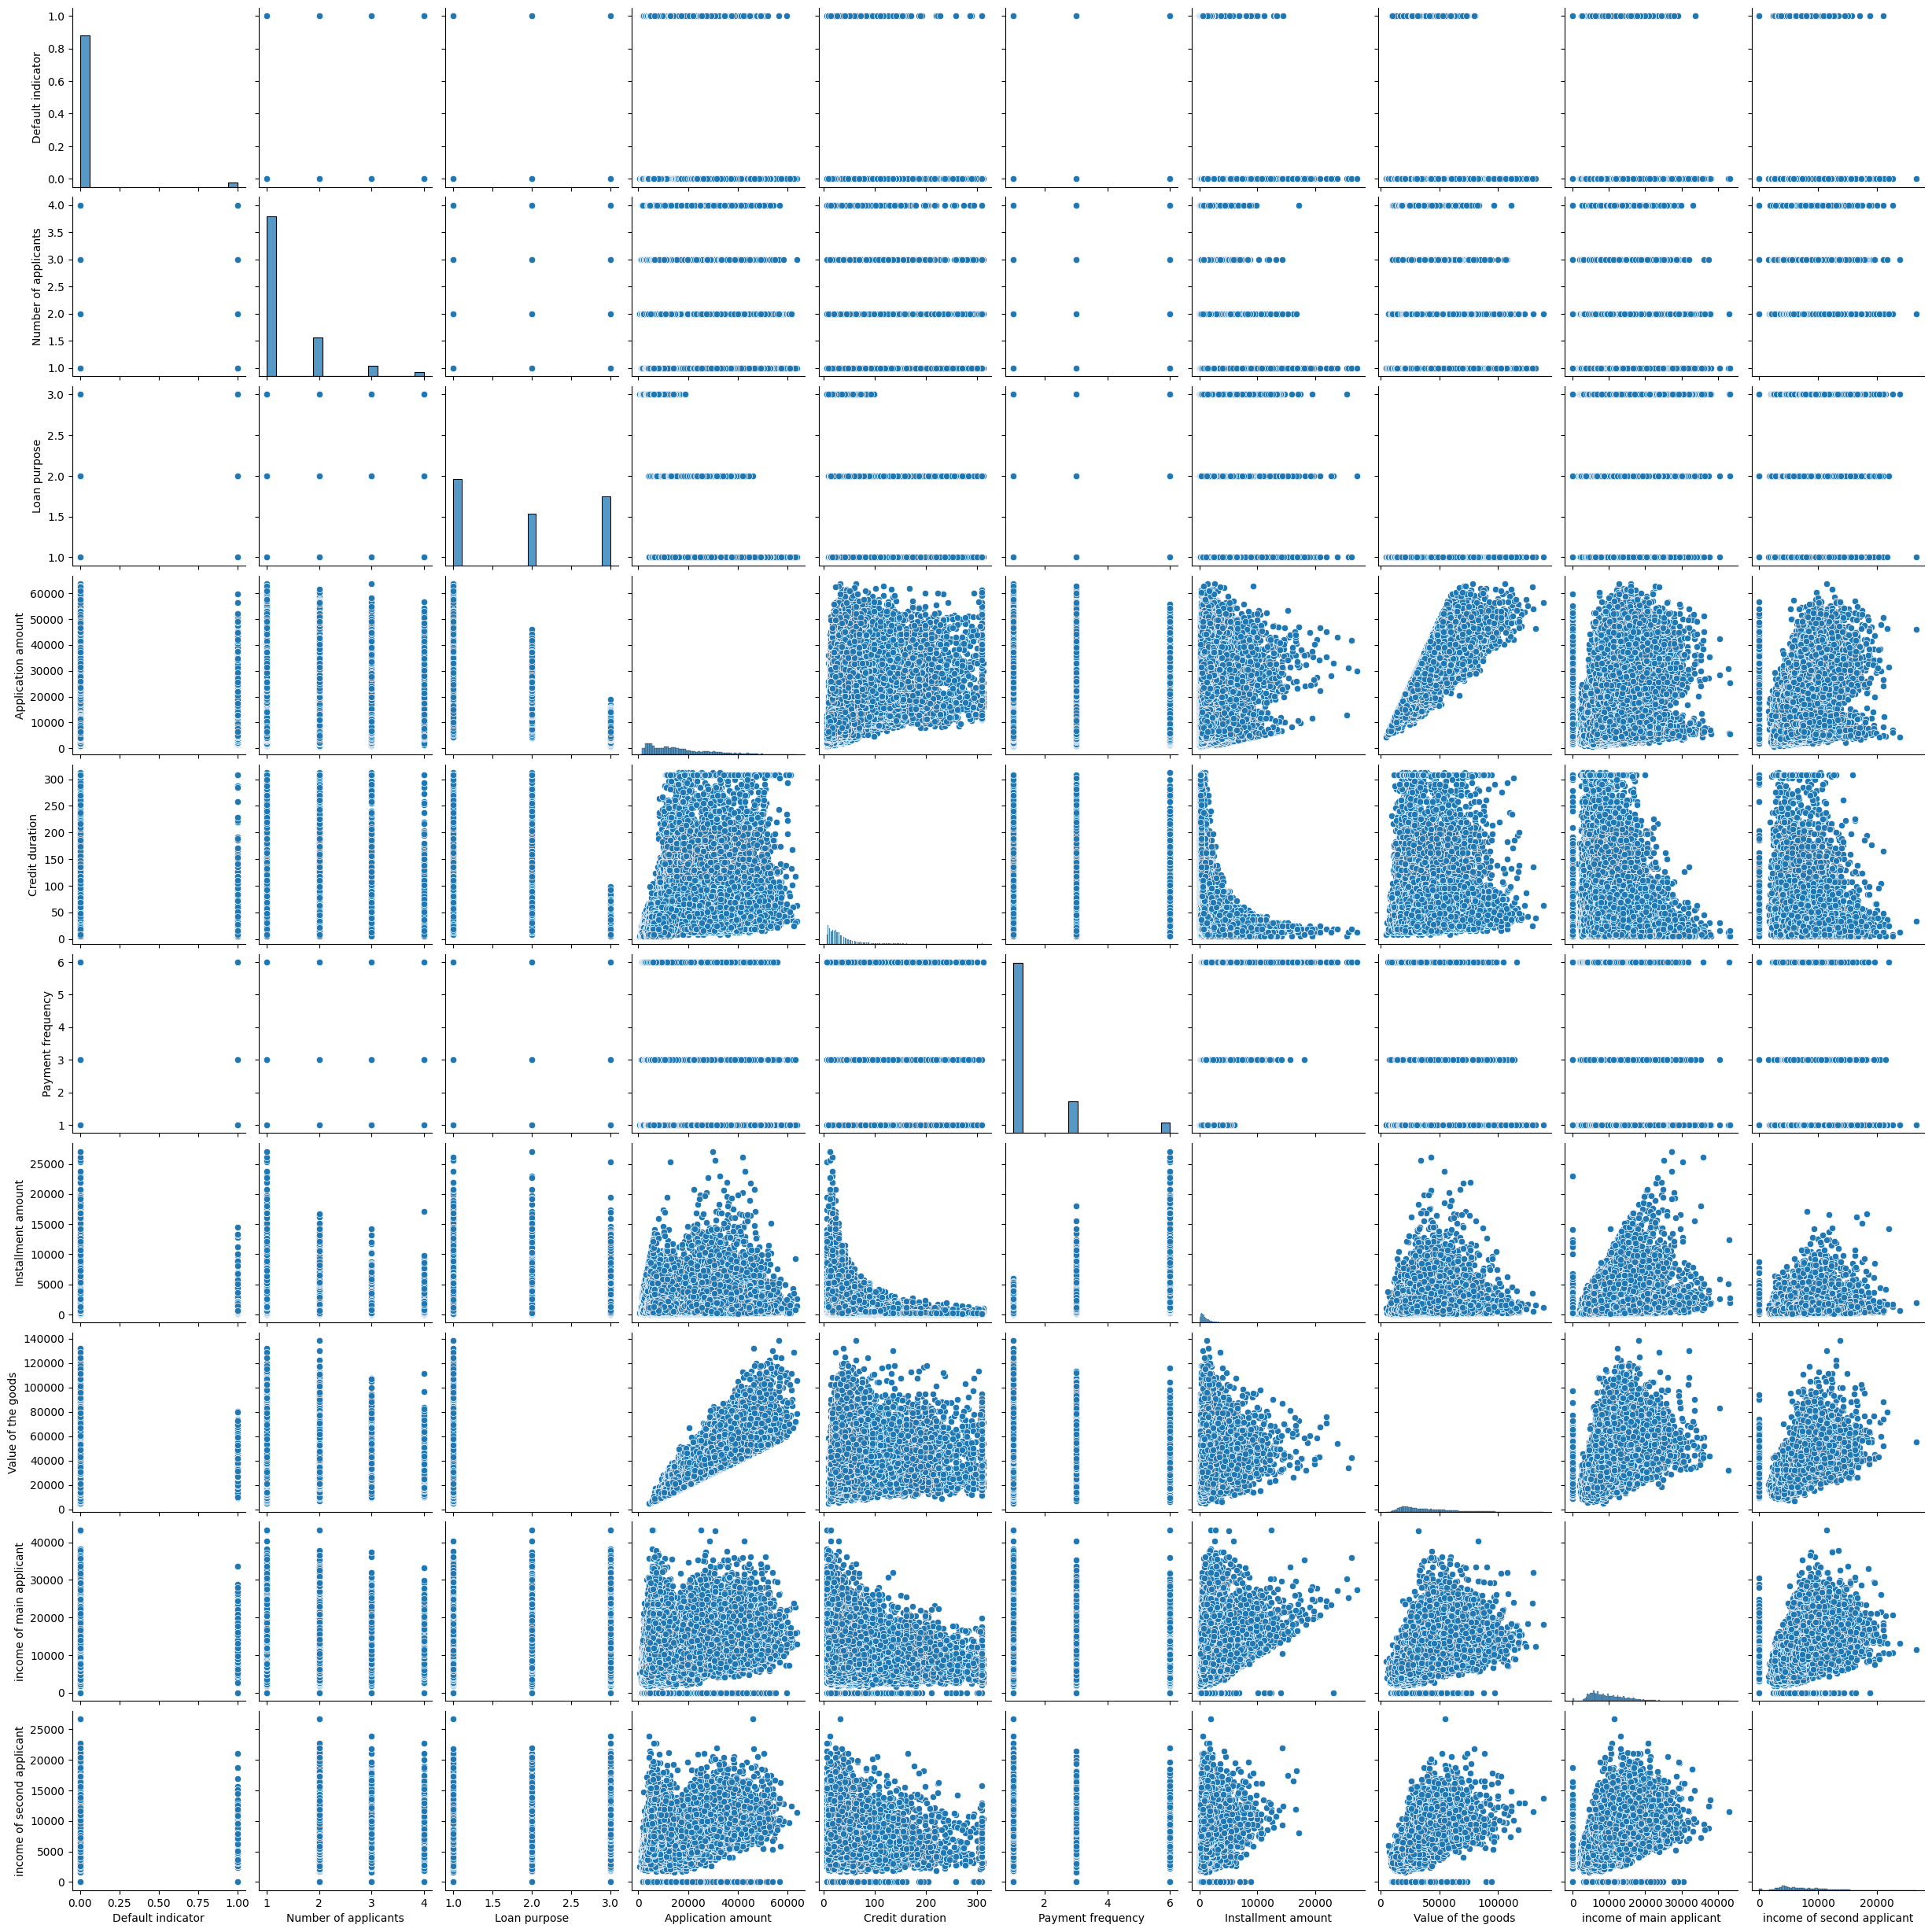

In [50]:
import matplotlib.pyplot as plt

sns.pairplot(dfSelected[['Default indicator', 'Number of applicants',
       'Loan purpose', 'Application amount', 'Credit duration',
       'Payment frequency', 'Installment amount', 'Value of the goods',
       'income of main applicant', 'income of second applicant']])

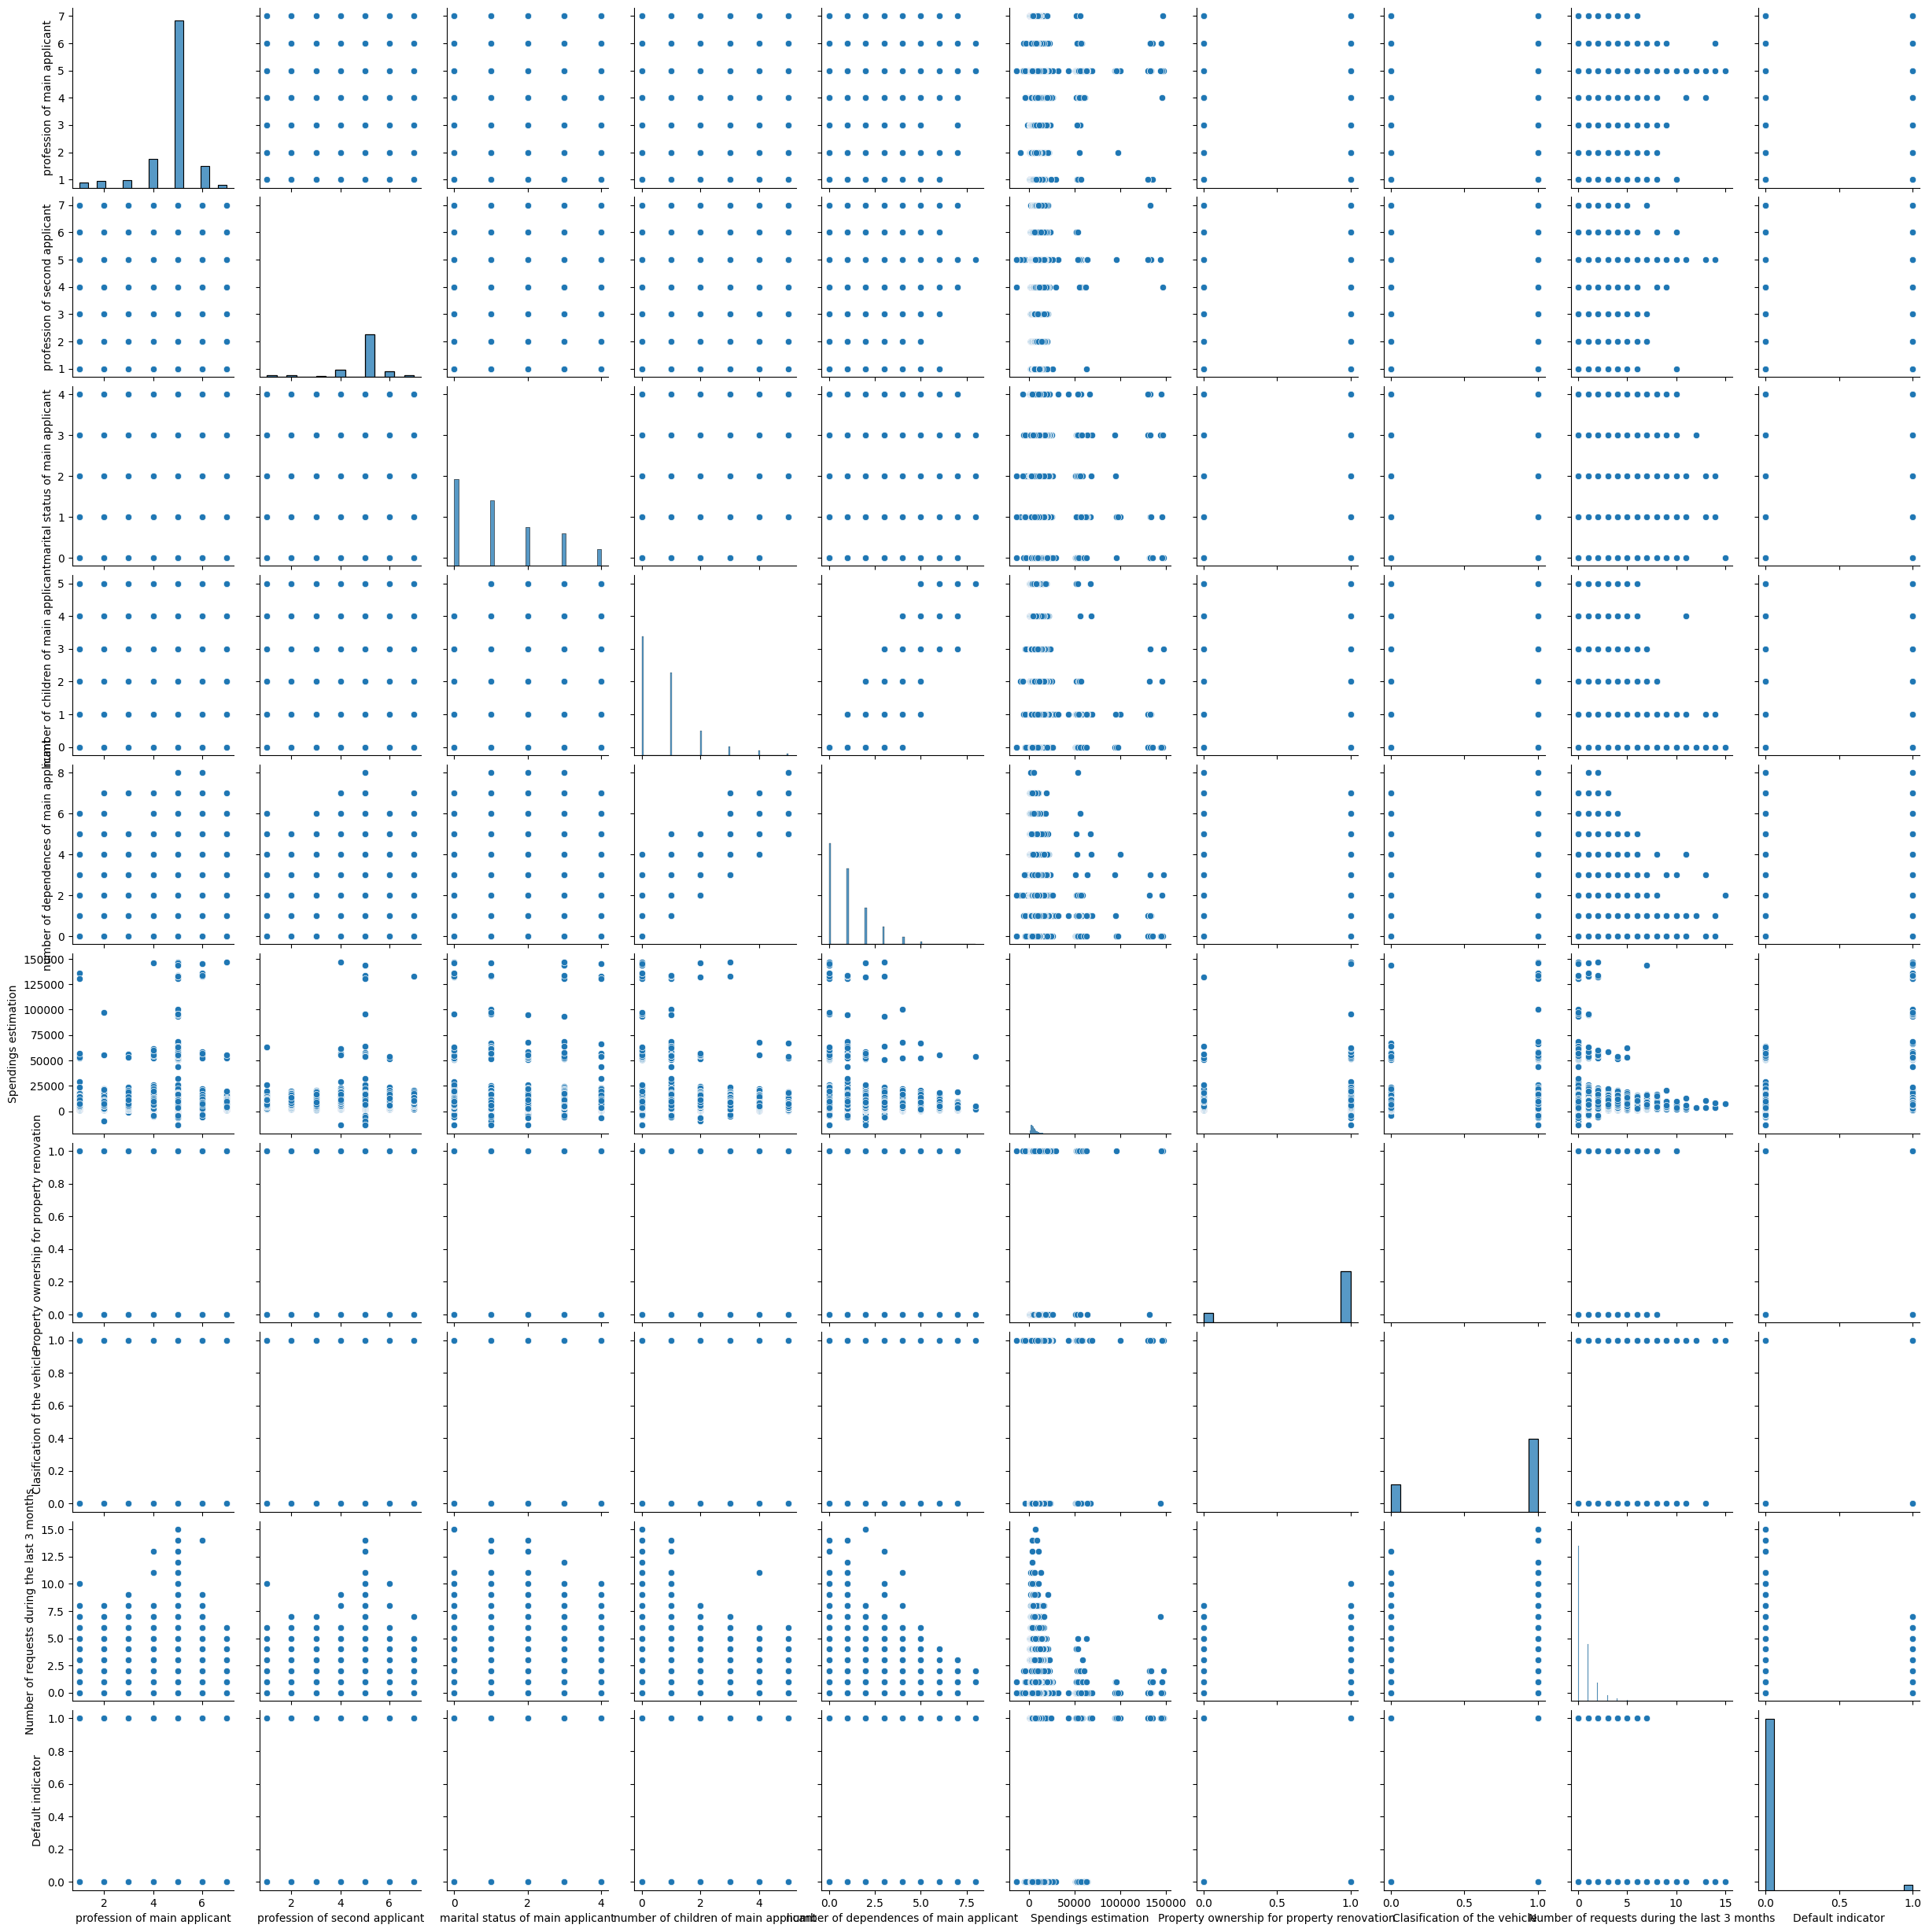

In [51]:
sns.pairplot(dfSelected[['profession of main applicant', 'profession of second applicant',
       'marital status of main applicant',
       'number of children of main applicant',
       'number of dependences of main applicant', 'Spendings estimation',
       'Property ownership for property renovation',
       'Clasification of the vehicle',
       'Number of requests during the last 3 months',
       'Default indicator']])

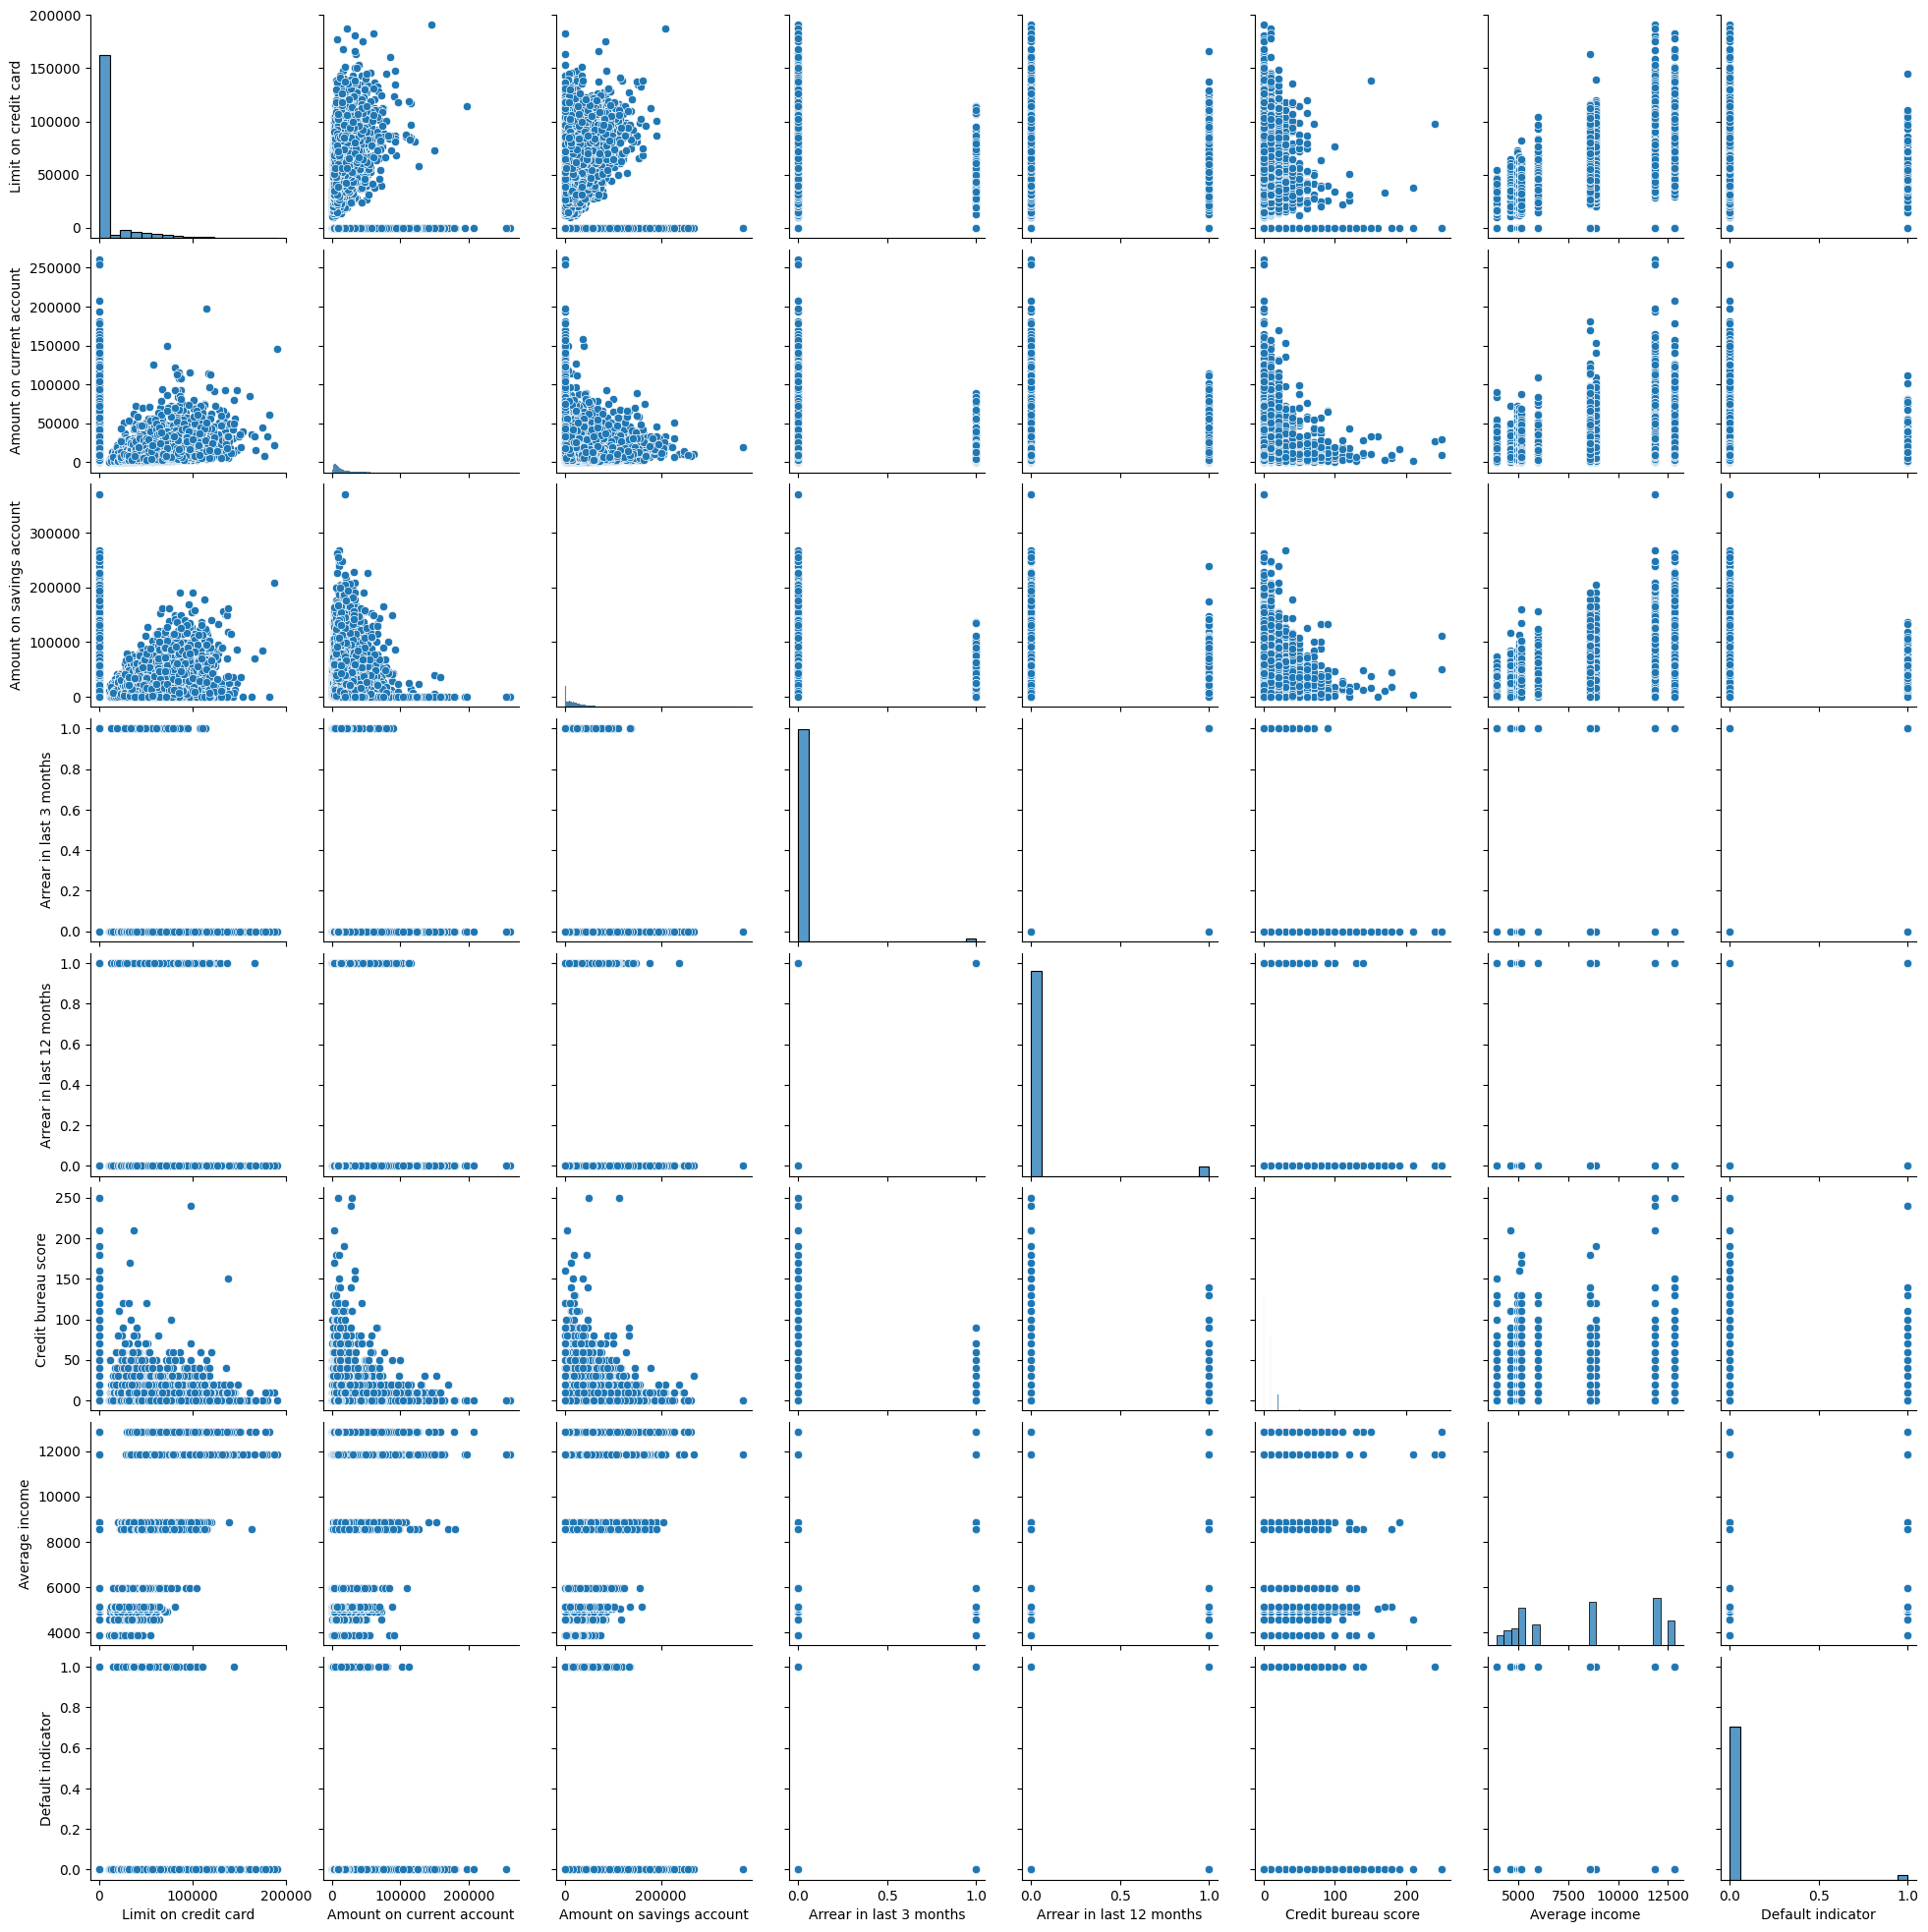

In [52]:
sns.pairplot(dfSelected[['Limit on credit card',
       'Amount on current account', 'Amount on savings account',
       'Arrear in last 3 months', 'Arrear in last 12 months',
       'Credit bureau score', 'Average income', 'Default indicator']])

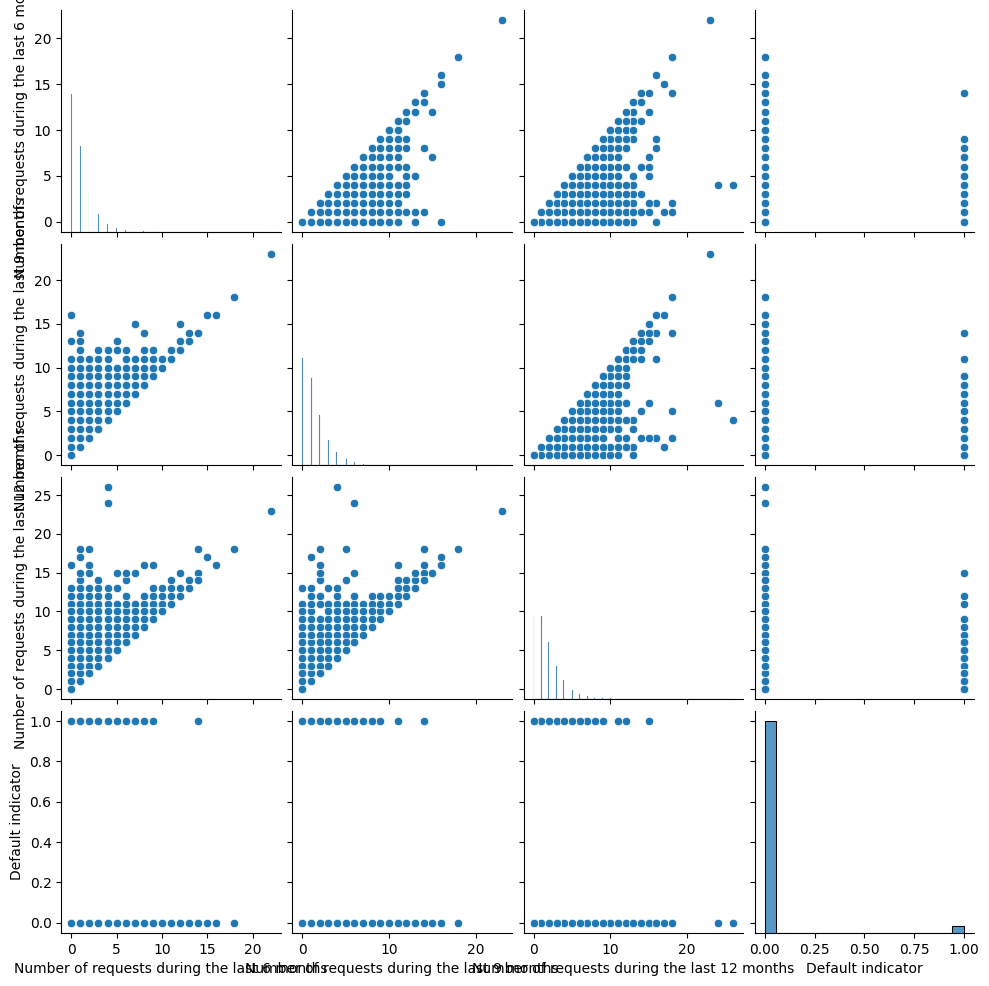

In [53]:
sns.pairplot(dfSelected[['Number of requests during the last 6 months',
       'Number of requests during the last 9 months',
       'Number of requests during the last 12 months', 'Default indicator']])

In [54]:
# spending estimation, 
dfSelected.corr()['Default indicator']

ID                                              0.001207
Customer ID                                    -0.013725
Default indicator                               1.000000
Number of applicants                           -0.008290
Loan purpose                                    0.031035
Application amount                             -0.028442
Credit duration                                -0.013875
Payment frequency                              -0.002222
Installment amount                             -0.007543
Value of the goods                             -0.031259
income of main applicant                       -0.041620
income of second applicant                     -0.020948
profession of main applicant                    0.020805
profession of second applicant                 -0.026565
marital status of main applicant                0.017262
number of children of main applicant           -0.011002
number of dependences of main applicant        -0.005827
Spendings estimation           

In [55]:

dfNonNull = dfSelected[~dfSelected['Default indicator'].isnull()]
dfNonNull

,ID,Customer ID,Default indicator,Number of applicants,Loan purpose,Application amount,Credit duration,Payment frequency,Installment amount,Value of the goods,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,0.0,1,2.0,7800,99,1,108.73,NaN,...,1,1,0,6768.42,0.00,0,0,0,3899,0.267045
1,11034978,32761663,0.0,1,1.0,11100,78,1,195.99,11200.0,...,0,0,15000,5937.66,3870.60,0,0,0,3899,0.533040
2,11034979,32701063,0.0,2,3.0,2400,15,1,248.34,NaN,...,2,2,0,5647.77,1463.08,0,0,10,3899,0.861555
3,11034980,32386786,0.0,3,1.0,11800,30,6,3538.68,12400.0,...,0,0,0,3594.90,21563.78,0,0,10,3899,0.506451
5,11034982,32861919,0.0,1,2.0,7200,36,1,267.19,NaN,...,2,2,0,1828.62,NaN,0,0,10,3899,0.003446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,11084969,32845249,0.0,1,3.0,5800,6,6,12180.00,NaN,...,3,3,0,NaN,NaN,0,0,0,12832,0.654447
49993,11084970,32623752,0.0,1,2.0,26100,15,3,7342.23,NaN,...,0,0,0,10816.79,108005.34,0,0,0,12832,0.225416
49995,11084972,32554904,1.0,2,1.0,49200,111,1,621.69,52600.0,...,2,2,0,NaN,NaN,0,0,0,12832,0.783954
49997,11084974,32433438,0.0,1,1.0,46700,18,1,3963.94,79000.0,...,0,0,0,9288.87,255018.31,0,0,0,12832,0.060722


In [60]:

for column in dfNonNull.columns:
    dfNonNull[column] = dfNonNull[column].fillna(dfNonNull[column].mean())
    
dfNonNull

C:\Users\proso\AppData\Local\Temp\ipykernel_11632\3813845990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNonNull[column] = dfNonNull[column].fillna(dfNonNull[column].mean())


,ID,Customer ID,Default indicator,Number of applicants,Loan purpose,Application amount,Credit duration,Payment frequency,Installment amount,Value of the goods,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,0.0,1,2.0,7800,99,1,108.73,35888.02843,...,1,1,0,6768.420000,0.000000,0,0,0,3899,0.267045
1,11034978,32761663,0.0,1,1.0,11100,78,1,195.99,11200.00000,...,0,0,15000,5937.660000,3870.600000,0,0,0,3899,0.533040
2,11034979,32701063,0.0,2,3.0,2400,15,1,248.34,35888.02843,...,2,2,0,5647.770000,1463.080000,0,0,10,3899,0.861555
3,11034980,32386786,0.0,3,1.0,11800,30,6,3538.68,12400.00000,...,0,0,0,3594.900000,21563.780000,0,0,10,3899,0.506451
5,11034982,32861919,0.0,1,2.0,7200,36,1,267.19,35888.02843,...,2,2,0,1828.620000,30135.832447,0,0,10,3899,0.003446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,11084969,32845249,0.0,1,3.0,5800,6,6,12180.00,35888.02843,...,3,3,0,12906.621527,30135.832447,0,0,0,12832,0.654447
49993,11084970,32623752,0.0,1,2.0,26100,15,3,7342.23,35888.02843,...,0,0,0,10816.790000,108005.340000,0,0,0,12832,0.225416
49995,11084972,32554904,1.0,2,1.0,49200,111,1,621.69,52600.00000,...,2,2,0,12906.621527,30135.832447,0,0,0,12832,0.783954
49997,11084974,32433438,0.0,1,1.0,46700,18,1,3963.94,79000.00000,...,0,0,0,9288.870000,255018.310000,0,0,0,12832,0.060722


In [61]:
dfNonNull['Default indicator'].value_counts()

0.0    35591
1.0     1127
Name: Default indicator, dtype: int64

In [66]:
sampleNegatives = dfNonNull[dfNonNull['Default indicator'] == 0.0]
sampleNegatives

,ID,Customer ID,Default indicator,Number of applicants,Loan purpose,Application amount,Credit duration,Payment frequency,Installment amount,Value of the goods,...,Number of requests during the last 9 months,Number of requests during the last 12 months,Limit on credit card,Amount on current account,Amount on savings account,Arrear in last 3 months,Arrear in last 12 months,Credit bureau score,Average income,_r_
0,11034977,32537148,0.0,1,2.0,7800,99,1,108.73,35888.02843,...,1,1,0,6768.420000,0.000000,0,0,0,3899,0.267045
1,11034978,32761663,0.0,1,1.0,11100,78,1,195.99,11200.00000,...,0,0,15000,5937.660000,3870.600000,0,0,0,3899,0.533040
2,11034979,32701063,0.0,2,3.0,2400,15,1,248.34,35888.02843,...,2,2,0,5647.770000,1463.080000,0,0,10,3899,0.861555
3,11034980,32386786,0.0,3,1.0,11800,30,6,3538.68,12400.00000,...,0,0,0,3594.900000,21563.780000,0,0,10,3899,0.506451
5,11034982,32861919,0.0,1,2.0,7200,36,1,267.19,35888.02843,...,2,2,0,1828.620000,30135.832447,0,0,10,3899,0.003446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,11084968,32609516,0.0,1,2.0,23600,48,1,670.87,35888.02843,...,1,3,0,18255.340000,172.920000,0,0,10,12832,0.859141
49992,11084969,32845249,0.0,1,3.0,5800,6,6,12180.00,35888.02843,...,3,3,0,12906.621527,30135.832447,0,0,0,12832,0.654447
49993,11084970,32623752,0.0,1,2.0,26100,15,3,7342.23,35888.02843,...,0,0,0,10816.790000,108005.340000,0,0,0,12832,0.225416
49997,11084974,32433438,0.0,1,1.0,46700,18,1,3963.94,79000.00000,...,0,0,0,9288.870000,255018.310000,0,0,0,12832,0.060722
